In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import skimage.io as sk
from Functions import image_processing as ip
from Functions import seeded_region_growing as srg
from Functions import unseeded_region_growing as urg
from Functions import seed_detection as sd
from Functions import region_merging as rm
from Functions import dice_score as ds
from Functions import segmentation as seg
from PIL import Image


## Challenges

### Cells at the border of the image

In the ground truth images cells that were only partly shown in the images were not present in the
ground truth images. We decided against removing these only partly shown cells, as we thought they
should be found by the algorithm. This had a small impact on our dice score, which varies for
different images, as a different amount of cells is only partly shown.


In [49]:
# Result Picture einlesen
ground_truth_hela = sk.imread("../Data/N2DL-HeLa/gt/man_seg13.tif")
# Kleineren Ausschnitt erstellen
# Dice score alt und neu berechnen



## Results

### Impact of gaussian filter on region growing

In this test, the influence of the usage of a gaussian filter before region growing was investigated.


In [32]:
image_hela = sk.imread("../Data/N2DL-HeLa/img/t13.tif")

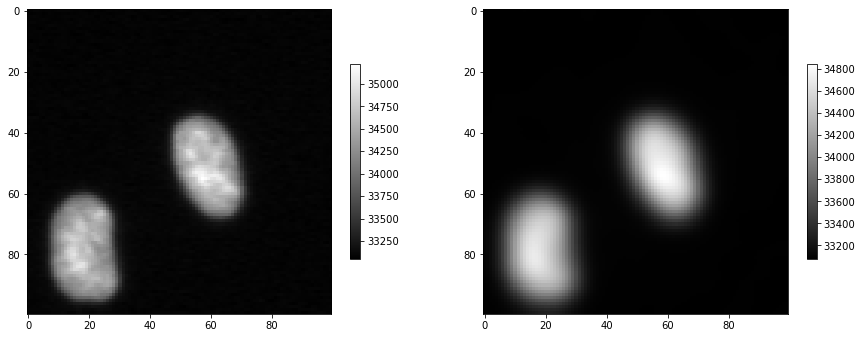

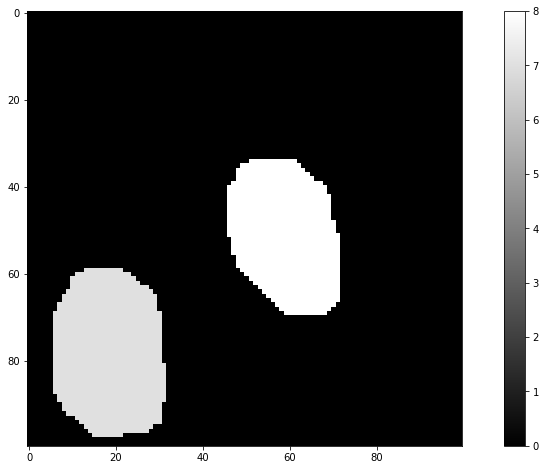

In [50]:
image_hela_small = image_hela[100:200, 450:550]
gaussian_hela = ip.gaussian_filter(image_hela_small, 3)
ip.show_two_images_colorbar(image_hela_small, gaussian_hela, 0.45)
ground_truth_hela_small = ground_truth_hela[100:200, 450:550]
ip.show_image(ground_truth_hela_small, 15, 8)

5000
32
4
5000
26
5


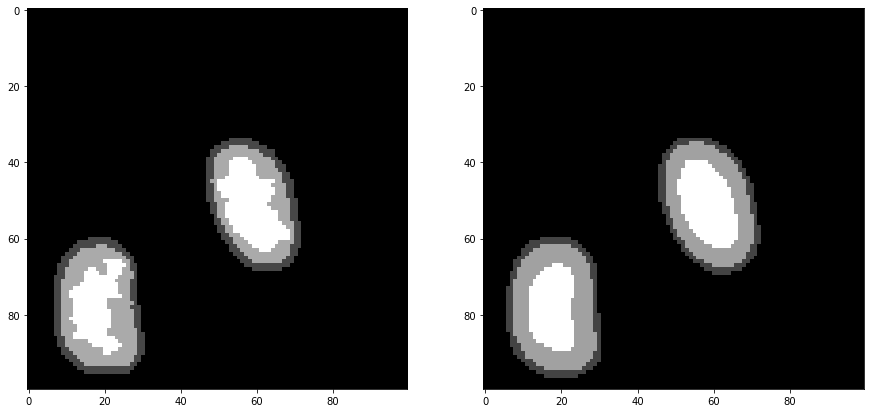

0.9576702953414044
0.9783991152277597


In [89]:
urg_hela_small = urg.unseeded_region_growing_algorithm(image_hela_small, (0,0), 50)
urg_hela_small = rm.region_merging(urg_hela_small, image_hela_small, 0.01, 300)
urg_gaussian_hela = urg.unseeded_region_growing_algorithm(gaussian_hela, (0,0), 50)
urg_gaussian_hela = rm.region_merging(urg_gaussian_hela, image_hela_small, 0.01, 300)

ip.show_two_images(urg_hela_small, urg_gaussian_hela)
print(ds.evaluate_accuracy_weighted(urg_hela_small, ground_truth_hela_small))
print(ds.evaluate_accuracy_weighted(urg_gaussian_hela, ground_truth_hela_small))


Even though the cells appear to be more blurry when using a gaussian filter with sigma is 3, the
dice score is higher after using the filter. After using the filter, the cells appear a bit
bigger and rounder, what matches the ground truth image more. Our algorithm

In [ ]:
image_gt = sk.imread("Data/N2DH-GOWT1/gt/man_seg31.tif")
image_gt_small = image_gt[400:500, 300:400]
image_small_segmented = seg.seeded_segmentation(image_intensity_small, image_gt_small, 0.9, 0.1, 150)
image_clipped_segmented = seg.seeded_segmentation(image_clipped, image_gt_small, 0.01, 0.1, 200)
image_clipped_extreme_segmented = seg.seeded_segmentation(image_clipped_extreme, image_gt_small, 0.9, 0.1, 200)
image_median_segmented = seg.seeded_segmentation(image_median, image_gt_small, 0.9, 0.1, 150)
image_gauss_segmented = seg.seeded_segmentation(image_gauss, image_gt_small, 0.9, 0.1, 100)
image_anisotropic_segmented = seg.seeded_segmentation(image_anisotropic, image_gt_small, 0.01, 0.2, 200)
ip.show_three_images_colorbar(image_small_segmented, image_clipped_segmented, image_clipped_extreme_segmented, 0.45)
ip.show_three_images_colorbar(image_median_segmented,image_gauss_segmented, image_anisotropic_segmented, 0.45)


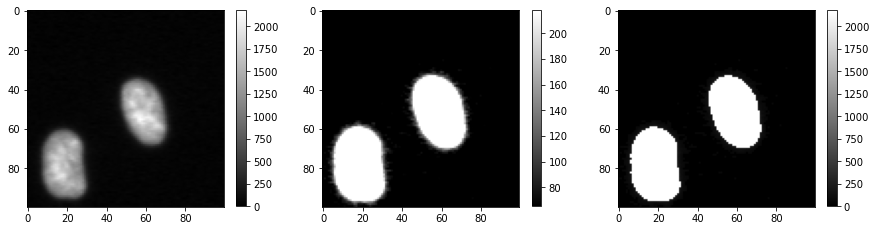

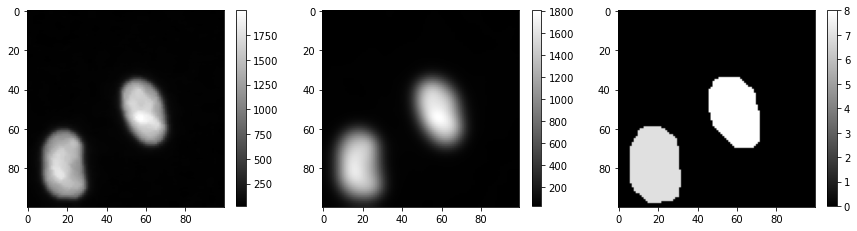

In [92]:
image_hela33_small = sk.imread("../Data/N2DL-HeLa/img/t13.tif")[100:200, 450:550]
image_hela33_small = ip.subtract_minimum(image_hela33_small)
image_gt_hela33_small = sk.imread("../Data/N2DL-HeLa/gt/man_seg13.tif")[100:200, 450:550]

image_hela33_clipped = ip.image_clipping(image_hela33_small,0.03*np.amax(image_hela33_small),0.1*np.amax(image_hela33_small))
image_hela33_clipped_extreme = ip.image_clipping_extreme(image_hela33_small, 0.03*np.amax(image_hela33_small), 0.1*np.amax(image_hela33_small))
image_hela33_median = ip.median_filter(image_hela33_small, 5)
image_hela33_gauss = ip.gaussian_filter(image_hela33_small, 3)
ip.show_three_images_colorbar(image_hela33_small, image_hela33_clipped, image_hela33_clipped_extreme, 0.45)
ip.show_three_images_colorbar(image_hela33_median, image_hela33_gauss, image_gt_hela33_small, 0.45)

5000
32
32
unweighted dice score: 0.968, weighted dice score: 0.9450573563426714
5000
3
3
unweighted dice score: 0.9911, weighted dice score: 0.9835074547694264
5000
5
2
unweighted dice score: 0.9891, weighted dice score: 0.9794161432465716
5000
30
6
unweighted dice score: 0.9778, weighted dice score: 0.9564227250071373
5000
26
7
unweighted dice score: 0.9517, weighted dice score: 0.9199305056468141


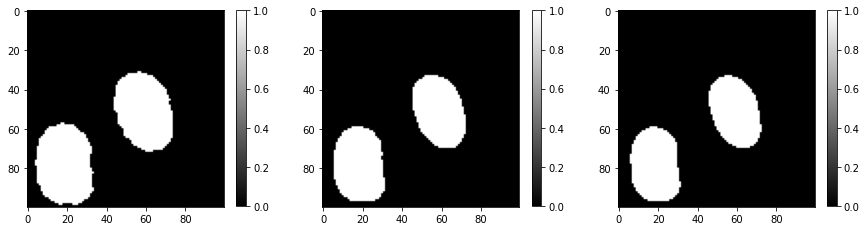

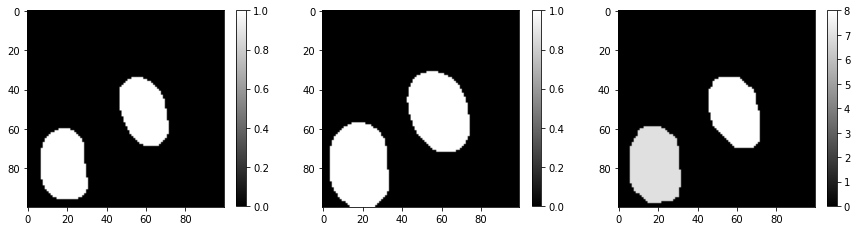

In [93]:
image_small_segmented_urg = seg.unseeded_segmentation(image_hela33_small, image_gt_hela33_small, (0,0), 50, 0.01, 300)
image_clipped_segmented_urg = seg.unseeded_segmentation(image_hela33_clipped, image_gt_hela33_small, (0,0), 50, 0.1, 300)
image_clipped_extreme_segmented_urg = seg.unseeded_segmentation(image_hela33_clipped_extreme, image_gt_hela33_small, (0,0), 50, 0.1, 300)
image_median_segmented_urg = seg.unseeded_segmentation(image_hela33_median, image_gt_hela33_small, (0,0), 50, 0.1, 300)
image_gauss_segmented_urg = seg.unseeded_segmentation(image_hela33_gauss, image_gt_hela33_small, (0,0), 50, 0.1, 300)
ip.show_three_images_colorbar(image_small_segmented_urg, image_clipped_segmented_urg, image_clipped_extreme_segmented_urg, 0.45)
ip.show_three_images_colorbar(image_median_segmented_urg,image_gauss_segmented_urg, image_gt_hela33_small, 0.45)